<center><h1>Use geo-data to cluster neighborhoods and generate recommendation for visitors to the Greater Seattle area</center></h1>             

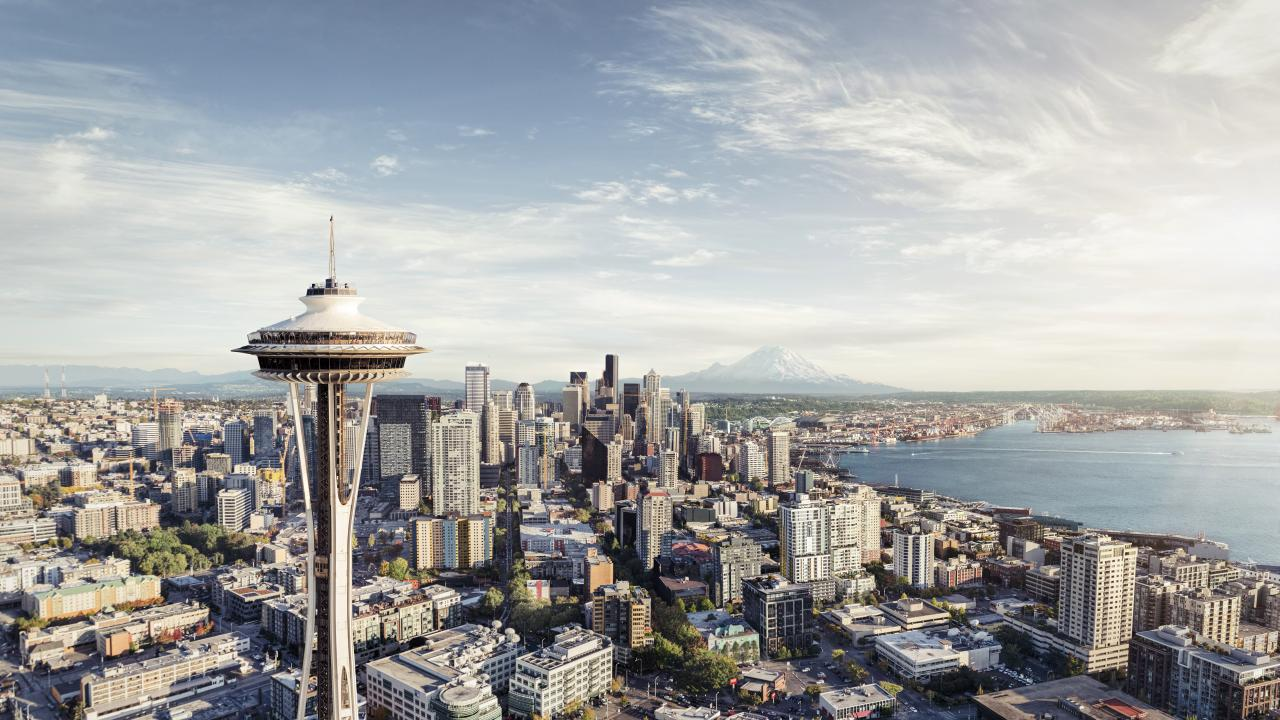

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from bs4 import BeautifulSoup
import re
from geopy.geocoders import Nominatim
import folium
import requests
import json
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from folium import plugins
import matplotlib.colors as colors

In [50]:
from geopy.geocoders import Nominatim

### Get the postal information of neighborhoods in Seattle

In [444]:
from tabula import read_pdf
neighborhood_df1 = read_pdf('/Users/tanghong/Documents/GitHub/Coursera_capstone/SubRegZipCityNeighborhood.pdf',pages = 1)
neighborhood_df1

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ZIP,City Name,Sub Region,Seattle\rNeighborhood
1,98001,Auburn,South Urban,NaN
2,98002,Auburn,South Urban,NaN
3,98003,Federal Way,South Urban,NaN
4,98004,Bellevue,East Urban,NaN
...,...,...,...,...
168,98013,Burton,Vashon Island,NaN
169,98014,Carnation,East Rural,NaN
170,98015,Bellevue,East Urban,NaN
171,98019,Duvall,East Rural,NaN


In [448]:
neighborhood_df1 = neighborhood_df1.iloc[0:57,:]
neighborhood_df1

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ZIP,City Name,Sub Region,Seattle\rNeighborhood
1,98001,Auburn,South Urban,NaN
2,98002,Auburn,South Urban,NaN
3,98003,Federal Way,South Urban,NaN
4,98004,Bellevue,East Urban,NaN
5,98005,Bellevue,East Urban,NaN
6,98006,Bellevue,East Urban,NaN
7,98007,Bellevue,East Urban,NaN
8,98008,Bellevue,East Urban,NaN
9,98009,Bellevue,East Urban,NaN


In [443]:
neighborhood_df2 = read_pdf('/Users/tanghong/Documents/GitHub/Coursera_capstone/SubRegZipCityNeighborhood.pdf',pages = 2)
neighborhood_df2

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ZIP,City Name,Sub Region,Seattle\rNeighborhood
1,98082,Bothell,North,NaN
2,98083,Kirkland,East Urban,NaN
3,98092,Auburn,South Urban,NaN
4,98093,Federal Way,South Urban,NaN
...,...,...,...,...
168,98160,Seattle,North,NaN
169,98166,Burien/Normandy Park,South Urban,NaN
170,98168,Tukwila,South Urban,NaN
171,98170,Seattle,South Urban,NaN


In [451]:
neighborhood_df22 = neighborhood_df2.iloc[1:57,:]
neighborhood_df22

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,98082,Bothell,North,NaN
2,98083,Kirkland,East Urban,NaN
3,98092,Auburn,South Urban,NaN
4,98093,Federal Way,South Urban,NaN
5,98101,Seattle,Seattle,Downtown
6,98102,Seattle,Seattle,Capitol Hill
7,98103,Seattle,Seattle,Lake Union
8,98104,Seattle,Seattle,Downtown
9,98105,Seattle,Seattle,Northeast
10,98106,Seattle,Seattle,Delridge


In [450]:
neighborhood_df3 = read_pdf('/Users/tanghong/Documents/GitHub/Coursera_capstone/SubRegZipCityNeighborhood.pdf',pages = 3)
neighborhood_df3

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ZIP,City Name,Sub Region,Seattle\rNeighborhood
1,98191,Seattle,Seattle,Downtown
2,98195,Seattle,Seattle,Northeast
3,98198,Des Moines,South Urban,NaN
4,98199,Seattle,Seattle,Queen Anne/Magnolia
5,98224,Baring,East Rural,NaN
6,98251,Gold Bar,East Rural,NaN
7,98288,Skykomish,East Rural,NaN
8,98354,Milton,South Urban,NaN
9,Sort By Sub Region,NaN,NaN,NaN


In [452]:
neighborhood_df33 = neighborhood_df3.iloc[1:9,:]
neighborhood_df33

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,98191,Seattle,Seattle,Downtown
2,98195,Seattle,Seattle,Northeast
3,98198,Des Moines,South Urban,NaN
4,98199,Seattle,Seattle,Queen Anne/Magnolia
5,98224,Baring,East Rural,NaN
6,98251,Gold Bar,East Rural,NaN
7,98288,Skykomish,East Rural,NaN
8,98354,Milton,South Urban,NaN


In [453]:
neighborhood_df = pd.concat([neighborhood_df1,neighborhood_df22,neighborhood_df33],ignore_index=True, axis = 0)
neighborhood_df

,Sort by ZIP Code,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ZIP,City Name,Sub Region,Seattle\rNeighborhood
1,98001,Auburn,South Urban,NaN
2,98002,Auburn,South Urban,NaN
3,98003,Federal Way,South Urban,NaN
4,98004,Bellevue,East Urban,NaN
...,...,...,...,...
116,98199,Seattle,Seattle,Queen Anne/Magnolia
117,98224,Baring,East Rural,NaN
118,98251,Gold Bar,East Rural,NaN
119,98288,Skykomish,East Rural,NaN


In [454]:
neighborhood_df.drop(neighborhood_df.index[00],inplace = True)

In [455]:
neighborhood_df.columns=['Zip','City Name','Sub Region','Neighborhood']

In [462]:
neighborhood_df

,Zip,City_Name
1,98001,Auburn
2,98002,Auburn
3,98003,Federal Way
4,98004,Bellevue
5,98005,Bellevue
...,...,...
116,98199,Seattle
117,98224,Baring
118,98251,Gold Bar
119,98288,Skykomish


In [461]:
neighborhood_df.drop(['Sub Region','Neighborhood'], axis=1,inplace = True)

In [465]:
neighborhood_df.columns = ['Zip','City_Name']

### Select the major cities around Seattle

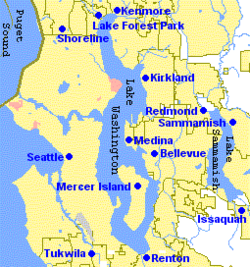

In [1627]:
cities = ['Bellevue','Kirkland','Redmond','Kent','Renton','SeaTac','Medina','Mercer Island','Federal Way','Auburn']

In [472]:
new_df = neighborhood_df[neighborhood_df['City_Name'].str.contains('Seattle')]
for i in cities:
    new = neighborhood_df[neighborhood_df['City_Name'].str.contains(i)]
    new_df = pd.concat([new_df,new],ignore_index=True, axis = 0)
new_df

,Zip,City_Name
0,98101,Seattle
1,98102,Seattle
2,98103,Seattle
3,98104,Seattle
4,98105,Seattle
...,...,...
79,98093,Federal Way
80,98001,Auburn
81,98002,Auburn
82,98071,Auburn


In [475]:
new_df.sort_values(by = 'Zip').reset_index(inplace=True)

In [476]:
new_df.City_Name.value_counts()

Seattle                43
Bellevue                7
Kent                    6
SeaTac                  5
Renton                  4
Federal Way             4
Auburn                  4
Kirkland                3
Redmond                 3
Shoreline & Seattle     2
Mercer Island           1
Medina                  1
Renton (PO BOX)         1
Name: City_Name, dtype: int64

### Obtain the coordinates of each neighborhood based on postal code

In [72]:
geolocator = Nominatim(user_agent="ny_explorer")

In [477]:
Zip = []
all_lat = []
all_lng = []
for i in range(new_df.shape[0]):
    zip_code = str(new_df.iloc[i,0])
    city_name = new_df.iloc[i,1]
    address = zip_code + ', WA'
    location = geolocator.geocode(address)
    if location:
        latitude = location.latitude
        longitude = location.longitude
        if latitude > 47 and longitude < -122:
            Zip.append(zip_code)
            all_lat.append(latitude)
            all_lng.append(longitude)
            print('The geograpical coordinate of ', city_name,', ', zip_code, ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Seattle ,  98101  are 47.61076329277471, -122.33618156915358.
The geograpical coordinate of  Seattle ,  98102  are 47.62161105, -122.32122658345864.
The geograpical coordinate of  Seattle ,  98103  are 47.65829585, -122.34821505.
The geograpical coordinate of  Seattle ,  98104  are 47.60070815, -122.33133388342861.
The geograpical coordinate of  Seattle ,  98105  are 47.66293395, -122.32055167555308.
The geograpical coordinate of  Seattle ,  98106  are 47.5168707, -122.35483002514911.
The geograpical coordinate of  Seattle ,  98107  are 47.6748482, -122.37831295000001.
The geograpical coordinate of  Seattle ,  98108  are 47.567587, -122.32236453234921.
The geograpical coordinate of  Seattle ,  98109  are 47.63311764205061, -122.34867362927079.
The geograpical coordinate of  Seattle ,  98112  are 47.62670905, -122.30678659995849.
The geograpical coordinate of  Seattle ,  98115  are 47.68492889095838, -122.29904762982831.
The geograpical coordinate of  Seat

In [478]:
lat_df = pd.DataFrame(all_lat)
lat_df.columns = ['Latitude']
lat_df

,Latitude
0,47.610763
1,47.621611
2,47.658296
3,47.600708
4,47.662934
...,...
61,47.314450
62,47.312785
63,47.305263
64,47.310544


In [479]:
lng_df = pd.DataFrame(all_lng)
lng_df.columns = ['Longitude']
lng_df

,Longitude
0,-122.336182
1,-122.321227
2,-122.348215
3,-122.331334
4,-122.320552
...,...
61,-122.321489
62,-122.272042
63,-122.215634
64,-122.230102


In [480]:
zip_df = pd.DataFrame(Zip)
zip_df.columns = ['Zip']
zip_df

,Zip
0,98101
1,98102
2,98103
3,98104
4,98105
...,...
61,98063
62,98001
63,98002
64,98071


In [481]:
ll = pd.concat([zip_df, lat_df, lng_df], axis = 1)

In [483]:
ll

,Zip,Latitude,Longitude
0,98101,47.610763,-122.336182
1,98102,47.621611,-122.321227
2,98103,47.658296,-122.348215
3,98104,47.600708,-122.331334
4,98105,47.662934,-122.320552
...,...,...,...
61,98063,47.314450,-122.321489
62,98001,47.312785,-122.272042
63,98002,47.305263,-122.215634
64,98071,47.310544,-122.230102


In [485]:
df_merged = pd.merge(new_df,ll,on='Zip')
df_merged

,Zip,City_Name,Latitude,Longitude
0,98101,Seattle,47.610763,-122.336182
1,98102,Seattle,47.621611,-122.321227
2,98103,Seattle,47.658296,-122.348215
3,98104,Seattle,47.600708,-122.331334
4,98105,Seattle,47.662934,-122.320552
...,...,...,...,...
61,98063,Federal Way,47.314450,-122.321489
62,98001,Auburn,47.312785,-122.272042
63,98002,Auburn,47.305263,-122.215634
64,98071,Auburn,47.310544,-122.230102


In [486]:
address = 'Seattle'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


### Display the neighborhood locations on a folium map

In [503]:
map_Seattle = folium.Map(location = [latitude-0.08,longitude+0.1], zoom_start = 10)
neighborhoods = plugins.MarkerCluster().add_to(map_Seattle)
for lat, lng, region, zip_code in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['City_Name'], df_merged['Zip']):
    label = '{}, {}'.format(region,zip_code)
    folium.Marker([lat, lng], popup=label).add_to(neighborhoods)
map_Seattle

### Query for the nearby venues for each neighborhood

In [504]:
CLIENT_ID = 'VGGETGO2N4VUHXF5KGDMVZAI4VIZG44GYBQMA5GU0LK45TQI' # your Foursquare ID
CLIENT_SECRET = 'JF55SBY3JHDG22XVCEDKVV2DFDYFXWNI30NNYLFWQ1SRO0M0' # your Foursquare Secret
VERSION = '20200729' # Foursquare API version
ACCESS_TOKEN = 'LXWKWKEHMHJ01IDATYPQ3AJBLNXQFEBFTCUCNPD5Z0CU4GZX'
LIMIT = 300
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('ACCESS TOEKN:' + ACCESS_TOKEN)

Your credentails:
CLIENT_ID: VGGETGO2N4VUHXF5KGDMVZAI4VIZG44GYBQMA5GU0LK45TQI
CLIENT_SECRET:JF55SBY3JHDG22XVCEDKVV2DFDYFXWNI30NNYLFWQ1SRO0M0
ACCESS TOEKN:LXWKWKEHMHJ01IDATYPQ3AJBLNXQFEBFTCUCNPD5Z0CU4GZX


In [505]:
def getNearByVenues(zips, regions, latitudes, longitudes, radius):
    venues_list = []
    for zi, region, lat, lng in zip(zips, regions, latitudes, longitudes):
        print(region + ", " + zi)
        url = 'http://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            lat,
            lng,
            VERSION,
            radius,
            LIMIT)
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        venues_list.append([(
            zi,
            region,
            lat,
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code','Sub Region','Latitude','Longitude','Venue_Name','Venue_Latitude','Venue_Longitude','Category']
    return nearby_venues

In [914]:
Venues = getNearByVenues(df_merged['Zip'],df_merged['City_Name'],df_merged['Latitude'],df_merged['Longitude'],2000)

Seattle, 98101
Seattle, 98102
Seattle, 98103
Seattle, 98104
Seattle, 98105
Seattle, 98106
Seattle, 98107
Seattle, 98108
Seattle, 98109
Seattle, 98112
Seattle, 98115
Seattle, 98116
Seattle, 98117
Seattle, 98118
Seattle, 98119
Seattle, 98121
Seattle, 98122
Seattle, 98125
Seattle, 98126
Shoreline & Seattle, 98133
Seattle, 98134
Seattle, 98136
Seattle, 98138
Seattle, 98144
Seattle, 98146
Seattle, 98154
Seattle, 98161
Seattle, 98164
Seattle, 98174
Shoreline & Seattle, 98177
Seattle, 98181
Seattle, 98191
Seattle, 98195
Seattle, 98199
Bellevue, 98004
Bellevue, 98005
Bellevue, 98006
Bellevue, 98007
Bellevue, 98008
Bellevue, 98009
Bellevue, 98015
Kirkland, 98033
Kirkland, 98034
Redmond, 98052
Redmond, 98053
Kent, 98030
Kent, 98031
Kent, 98032
Kent, 98042
Renton, 98055
Renton, 98056
Renton (PO BOX), 98057
Renton, 98058
Renton, 98059
SeaTac, 98148
SeaTac, 98158
SeaTac, 98188
Medina, 98039
Mercer Island, 98040
Federal Way, 98003
Federal Way, 98023
Federal Way, 98063
Auburn, 98001
Auburn, 98002
Aub

In [915]:
Venues

,Zip Code,Sub Region,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Category
0,98101,Seattle,47.610763,-122.336182,Victrola Coffee Roasters,47.610895,-122.338952,Coffee Shop
1,98101,Seattle,47.610763,-122.336182,The 5th Avenue Theatre,47.608996,-122.334162,Theater
2,98101,Seattle,47.610763,-122.336182,Veggie Grill,47.609882,-122.336637,Vegetarian / Vegan Restaurant
3,98101,Seattle,47.610763,-122.336182,Urban Yoga Spa,47.612520,-122.338670,Yoga Studio
4,98101,Seattle,47.610763,-122.336182,Gelatiamo,47.608754,-122.336992,Dessert Shop
...,...,...,...,...,...,...,...,...
5278,98092,Auburn,47.244677,-122.209858,Lakeland Hills Park,47.257464,-122.210800,Park
5279,98092,Auburn,47.244677,-122.209858,Forest Canyon Coffee,47.228733,-122.202332,Café
5280,98092,Auburn,47.244677,-122.209858,Buzz On In,47.250733,-122.186517,Coffee Shop
5281,98092,Auburn,47.244677,-122.209858,Cavallo Espresso,47.228296,-122.202072,Coffee Shop


In [916]:
category_count = Venues.Category.value_counts()

In [917]:
category_count = category_count.to_frame()
category_count.reset_index(inplace = True)
category_count.columns = ['Category','Count']

In [918]:
category_count.head(30)

,Category,Count
0,Coffee Shop,420
1,Pizza Place,152
2,Park,135
3,Sandwich Place,129
4,Bakery,120
5,Mexican Restaurant,111
6,Hotel,109
7,Grocery Store,88
8,Vietnamese Restaurant,85
9,Bar,79


### Filter out the majority and minority venue categories

In [1031]:
minority = []
for i in range(category_count.shape[0]):
    if category_count.iloc[i,1] == 1:
        minority.append(category_count.iloc[i,0])

In [1032]:
majority = []
for i in range(category_count.shape[0]):
    if category_count.iloc[i,1] > 100:
        majority.append(category_count.iloc[i,0])
majority = majority + ['Bank','ATM','Bus Stop','Bus Station','Gas Station']

In [1033]:
len(minority)

53

In [1034]:
len(majority)

12

In [1035]:
Venues2 = Venues[~Venues['Category'].isin(majority)]
Venues3 = Venues2[~Venues2['Category'].isin(minority)]

In [1036]:
Venues3.reset_index(inplace=True)

In [1037]:
Venues3.groupby('Zip Code').count()

,index,Sub Region,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Category
Zip Code,,,,,,,,
98001,8,8,8,8,8,8,8,8
98002,60,60,60,60,60,60,60,60
98003,64,64,64,64,64,64,64,64
98004,88,88,88,88,88,88,88,88
98005,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...
98181,74,74,74,74,74,74,74,74
98188,74,74,74,74,74,74,74,74
98191,71,71,71,71,71,71,71,71


In [1038]:
we_use = Venues3

In [1039]:
we_use

,index,Zip Code,Sub Region,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Category
0,1,98101,Seattle,47.610763,-122.336182,The 5th Avenue Theatre,47.608996,-122.334162,Theater
1,2,98101,Seattle,47.610763,-122.336182,Veggie Grill,47.609882,-122.336637,Vegetarian / Vegan Restaurant
2,3,98101,Seattle,47.610763,-122.336182,Urban Yoga Spa,47.612520,-122.338670,Yoga Studio
3,4,98101,Seattle,47.610763,-122.336182,Gelatiamo,47.608754,-122.336992,Dessert Shop
4,5,98101,Seattle,47.610763,-122.336182,Benaroya Hall,47.607957,-122.336456,Concert Hall
...,...,...,...,...,...,...,...,...,...
3941,5273,98092,Auburn,47.244677,-122.209858,Redbox,47.245107,-122.208266,Video Store
3942,5274,98092,Auburn,47.244677,-122.209858,Al Lago Restaurant,47.229154,-122.200515,Italian Restaurant
3943,5275,98092,Auburn,47.244677,-122.209858,Log Cabin Pub,47.232184,-122.224380,Pub
3944,5277,98092,Auburn,47.244677,-122.209858,the big hill,47.250230,-122.221500,Trail


In [1040]:
unique_venues = we_use['Category'].unique()
len(unique_venues)

273

### Create a dummy for each venue category

In [1041]:
Seattle_dummy = pd.get_dummies(we_use[['Category']], prefix = "", prefix_sep = "")
Seattle_dummy

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Animal Shelter,Antique Shop,...,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1042]:
new = we_use['Zip Code'].to_frame()
Seattle_dummy2 = pd.concat([new,Seattle_dummy],axis =1)
Seattle_grouped = Seattle_dummy2.groupby('Zip Code').mean().reset_index()
Seattle_grouped

,Zip Code,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Animal Shelter,...,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,98001,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,98002,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,98003,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.046875,0.0,...,0.031250,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,98004,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022727,0.0,...,0.000000,0.000000,0.0,0.0,0.011364,0.011364,0.0,0.0,0.011364,0.011364
4,98005,0.0,0.000000,0.011905,0.0,0.000000,0.000000,0.000000,0.011905,0.0,...,0.011905,0.000000,0.0,0.0,0.000000,0.011905,0.0,0.0,0.000000,0.011905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,98181,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.013514,0.0,...,0.000000,0.013514,0.0,0.0,0.013514,0.013514,0.0,0.0,0.013514,0.027027
62,98188,0.0,0.013514,0.000000,0.0,0.013514,0.013514,0.027027,0.054054,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.013514,0.0,0.0,0.013514,0.000000
63,98191,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.014085,0.0,...,0.000000,0.014085,0.0,0.0,0.014085,0.014085,0.0,0.0,0.014085,0.028169
64,98195,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.011905,0.011905


In [1043]:
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [1044]:
clustering = Seattle_grouped.drop(['Zip Code'],axis=1)

### Use an elbow method to pick the proper K for K-means

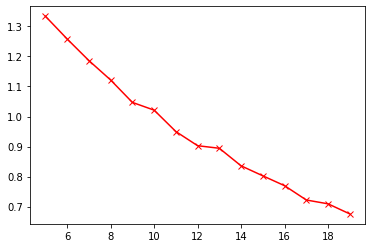

In [1219]:
K = range(5,20)
accuracy = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(clustering)
    accuracy.append(km.inertia_)
plt.plot(K, accuracy, 'rx-')

In [1318]:
num_top_venues = 7
columns = ['Zip']
for rank in range(num_top_venues):
    columns.append('Number ' + str(rank+1) + ' popular local venue type')
popular_venues = pd.DataFrame(columns = columns)
popular_venues['Zip'] = Seattle_grouped['Zip Code']
for ind in range(Seattle_grouped.shape[0]):
    popular_venues.iloc[ind,1:] = most_common_venues(Seattle_grouped.iloc[ind, :], num_top_venues)

In [1319]:
popular_venues.head()

,Zip,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
0,98001,Convenience Store,Video Store,Home Service,Playground,Baseball Field,Construction & Landscaping,Food
1,98002,Fast Food Restaurant,American Restaurant,Café,Pharmacy,Convenience Store,Asian Restaurant,Gym
2,98003,Korean Restaurant,Fast Food Restaurant,American Restaurant,Mobile Phone Shop,Hardware Store,Rental Car Location,Warehouse Store
3,98004,Shopping Mall,Spa,Grocery Store,Steakhouse,Toy / Game Store,Electronics Store,Seafood Restaurant
4,98005,Grocery Store,Rental Car Location,Chinese Restaurant,Spa,Burger Joint,Gym,Japanese Restaurant


### Cluster the neighborhoods by venues

In [1222]:
num_of_clusters = 9
km = KMeans(n_clusters = num_of_clusters,n_init = 300, max_iter = 600)
km.fit(clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=9, n_init=300, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1223]:
km.inertia_

1.0202095073952744

In [1320]:
popular_venues.insert(0, 'Cluster', km.labels_)
Seattle = df_merged
Seattle = Seattle.join(popular_venues.set_index('Zip'), on = 'Zip')
Seattle.head()

,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
0,98101,Seattle,47.610763,-122.336182,1,Breakfast Spot,Sushi Restaurant,Yoga Studio,Bar,Market,Brewery,Seafood Restaurant
1,98102,Seattle,47.621611,-122.321227,0,Italian Restaurant,Café,Cocktail Bar,Ice Cream Shop,Donut Shop,Salon / Barbershop,Burger Joint
2,98103,Seattle,47.658296,-122.348215,0,Bar,Japanese Restaurant,New American Restaurant,Korean Restaurant,Ice Cream Shop,Thai Restaurant,Bookstore
3,98104,Seattle,47.600708,-122.331334,1,Vietnamese Restaurant,Seafood Restaurant,Dumpling Restaurant,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Noodle House
4,98105,Seattle,47.662934,-122.320552,0,Ice Cream Shop,Thai Restaurant,Korean Restaurant,Restaurant,Café,Seafood Restaurant,Bubble Tea Shop


In [1321]:
Seattle2 = Seattle.dropna()

In [1322]:
Seattle2.reset_index(inplace = True)

### Create a list for top 7 popular venues for each neighborhood

In [1332]:
Seattle2

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
0,0,98101,Seattle,47.610763,-122.336182,1,Breakfast Spot,Sushi Restaurant,Yoga Studio,Bar,Market,Brewery,Seafood Restaurant
1,1,98102,Seattle,47.621611,-122.321227,0,Italian Restaurant,Café,Cocktail Bar,Ice Cream Shop,Donut Shop,Salon / Barbershop,Burger Joint
2,2,98103,Seattle,47.658296,-122.348215,0,Bar,Japanese Restaurant,New American Restaurant,Korean Restaurant,Ice Cream Shop,Thai Restaurant,Bookstore
3,3,98104,Seattle,47.600708,-122.331334,1,Vietnamese Restaurant,Seafood Restaurant,Dumpling Restaurant,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Noodle House
4,4,98105,Seattle,47.662934,-122.320552,0,Ice Cream Shop,Thai Restaurant,Korean Restaurant,Restaurant,Café,Seafood Restaurant,Bubble Tea Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,98063,Federal Way,47.314450,-122.321489,2,Korean Restaurant,Grocery Store,Burger Joint,Vietnamese Restaurant,Pet Store,Ice Cream Shop,Lingerie Store
62,62,98001,Auburn,47.312785,-122.272042,6,Convenience Store,Video Store,Home Service,Playground,Baseball Field,Construction & Landscaping,Food
63,63,98002,Auburn,47.305263,-122.215634,5,Fast Food Restaurant,American Restaurant,Café,Pharmacy,Convenience Store,Asian Restaurant,Gym
64,64,98071,Auburn,47.310544,-122.230102,2,Clothing Store,Ice Cream Shop,Cosmetics Shop,Burger Joint,Salon / Barbershop,Lingerie Store,Kids Store


### Display the clusters on a folium map

In [1284]:
map_clusters = folium.Map(location = [latitude-0.105,longitude+0.1], zoom_start = 10)
clust = plugins.MarkerCluster().add_to(map_clusters)
colors = [
    'red',
    'blue',
    'lightgray',
    'orange',
    'beige',
    'darkgreen',
    'black',
    'purple',
    'cadetblue'
]
marker_colors = []
for lat,lng,Neighborhood,zip_code,cluster in zip(Seattle2['Latitude'],Seattle2['Longitude'],Seattle2['City_Name'],Seattle2['Zip'],Seattle2['Cluster']):
        label = folium.Popup(str(Neighborhood)+', '+zip_code+' Cluster '+ str(cluster), parse_html = True)
        folium.Marker([lat, lng], popup=label,icon=folium.Icon(color=colors[int(cluster) - 1],icon = 'tag')).add_to(map_clusters)
        
map_clusters

In [1356]:
Seattle2.loc[Seattle2.Cluster == 0,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
1,1,98102,Seattle,47.621611,-122.321227,0,Italian Restaurant,Café,Cocktail Bar,Ice Cream Shop,Donut Shop,Salon / Barbershop,Burger Joint
2,2,98103,Seattle,47.658296,-122.348215,0,Bar,Japanese Restaurant,New American Restaurant,Korean Restaurant,Ice Cream Shop,Thai Restaurant,Bookstore
4,4,98105,Seattle,47.662934,-122.320552,0,Ice Cream Shop,Thai Restaurant,Korean Restaurant,Restaurant,Café,Seafood Restaurant,Bubble Tea Shop
6,6,98107,Seattle,47.674848,-122.378313,0,Brewery,Cocktail Bar,Ice Cream Shop,Beer Bar,Italian Restaurant,New American Restaurant,Bar
8,8,98109,Seattle,47.633118,-122.348674,0,Gym / Fitness Center,Italian Restaurant,Museum,Grocery Store,Yoga Studio,Vegetarian / Vegan Restaurant,Indie Movie Theater
9,9,98112,Seattle,47.626709,-122.306787,0,Italian Restaurant,Cocktail Bar,Garden,Scenic Lookout,Thai Restaurant,Sushi Restaurant,American Restaurant
10,10,98115,Seattle,47.684929,-122.299048,0,Pub,Gym,Bar,Chinese Restaurant,Video Store,Italian Restaurant,Japanese Restaurant
11,11,98116,Seattle,47.583364,-122.382418,0,Scenic Lookout,Ice Cream Shop,Thai Restaurant,Vietnamese Restaurant,Convenience Store,Juice Bar,Pub
14,14,98119,Seattle,47.641999,-122.359281,0,Grocery Store,Gym / Fitness Center,Brewery,Bar,Ice Cream Shop,Food Truck,Italian Restaurant
16,16,98122,Seattle,47.616047,-122.323123,0,Cocktail Bar,Yoga Studio,Ice Cream Shop,Grocery Store,Italian Restaurant,Donut Shop,Dumpling Restaurant


In [1357]:
Seattle2.loc[Seattle2.Cluster == 1,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
0,0,98101,Seattle,47.610763,-122.336182,1,Breakfast Spot,Sushi Restaurant,Yoga Studio,Bar,Market,Brewery,Seafood Restaurant
3,3,98104,Seattle,47.600708,-122.331334,1,Vietnamese Restaurant,Seafood Restaurant,Dumpling Restaurant,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Noodle House
15,15,98121,Seattle,47.615494,-122.344680,1,Breakfast Spot,Sushi Restaurant,Yoga Studio,Marijuana Dispensary,Seafood Restaurant,Sculpture Garden,Scenic Lookout
22,22,98138,Seattle,47.606038,-122.331993,1,Seafood Restaurant,Breakfast Spot,Italian Restaurant,Dumpling Restaurant,Deli / Bodega,Sushi Restaurant,New American Restaurant
25,25,98154,Seattle,47.606189,-122.333591,1,Breakfast Spot,Seafood Restaurant,Italian Restaurant,Dumpling Restaurant,New American Restaurant,Brewery,Fish Market
26,26,98161,Seattle,47.607627,-122.334856,1,Seafood Restaurant,Breakfast Spot,Italian Restaurant,Sushi Restaurant,Dumpling Restaurant,Brewery,New American Restaurant
27,27,98164,Seattle,47.605868,-122.332185,1,Seafood Restaurant,Breakfast Spot,Italian Restaurant,Dumpling Restaurant,Deli / Bodega,New American Restaurant,Sushi Restaurant
28,28,98174,Seattle,47.604615,-122.335345,1,Seafood Restaurant,Breakfast Spot,New American Restaurant,Deli / Bodega,Italian Restaurant,Dumpling Restaurant,Sushi Restaurant
30,30,98181,Seattle,47.611142,-122.338984,1,Breakfast Spot,Sushi Restaurant,Seafood Restaurant,Yoga Studio,Marijuana Dispensary,Fish Market,Italian Restaurant
31,31,98191,Seattle,47.613147,-122.334381,1,Bar,Yoga Studio,Fish Market,Brewery,Seafood Restaurant,Sushi Restaurant,Middle Eastern Restaurant


In [1358]:
Seattle2.loc[Seattle2.Cluster == 2,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
5,5,98106,Seattle,47.516871,-122.354830,2,Grocery Store,Convenience Store,Fried Chicken Joint,Burger Joint,Pharmacy,Video Store,Taco Place
7,7,98108,Seattle,47.567587,-122.322365,2,Brewery,Café,Bar,Pub,Food Truck,Taco Place,Nightclub
12,12,98117,Seattle,47.685207,-122.391576,2,Burger Joint,Thai Restaurant,Food Truck,Seafood Restaurant,Caribbean Restaurant,Beer Bar,Beach
13,13,98118,Seattle,47.541478,-122.276021,2,Vietnamese Restaurant,Gym,Pub,Café,Chinese Restaurant,Bar,Grocery Store
17,17,98125,Seattle,47.719612,-122.300185,2,Marijuana Dispensary,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Vietnamese Restaurant
18,18,98126,Seattle,47.545540,-122.375152,2,Pub,Grocery Store,Chinese Restaurant,Garden,Hardware Store,Taco Place,Pet Store
19,19,98133,Shoreline & Seattle,47.760808,-122.335244,2,Convenience Store,Video Store,Bar,Pharmacy,Deli / Bodega,Fast Food Restaurant,Korean Restaurant
20,20,98134,Seattle,47.578862,-122.332960,2,Food Truck,Brewery,Marijuana Dispensary,Sporting Goods Shop,Taco Place,Sports Bar,Baseball Stadium
21,21,98136,Seattle,47.539016,-122.388806,2,Boat or Ferry,Pool,Playground,Beach,Food Truck,Pub,Chinese Restaurant
23,23,98144,Seattle,47.585260,-122.302072,2,Vietnamese Restaurant,Playground,Chinese Restaurant,Brewery,Grocery Store,Scenic Lookout,BBQ Joint


In [1359]:
Seattle2.loc[Seattle2.Cluster == 3,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
44,44,98053,Redmond,47.666155,-122.04588,3,Trail,Home Service,Flower Shop,Cupcake Shop,Dance Studio,Fish Market,Fish & Chips Shop


In [1360]:
Seattle2.loc[Seattle2.Cluster == 4,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
39,39,98009,Bellevue,47.636918,-122.237476,4,Trail,Pool,Golf Course,Bike Trail,Bay,Business Service,Café
57,57,98039,Medina,47.633274,-122.232970,4,Trail,Flower Shop,Dog Run,Café,Business Service,Pool,Golf Course


In [1361]:
Seattle2.loc[Seattle2.Cluster == 5,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
41,41,98033,Kirkland,47.657552,-122.203327,5,American Restaurant,Harbor / Marina,Café,Seafood Restaurant,Beach,Video Store,Asian Restaurant
47,47,98032,Kent,47.359338,-122.306938,5,Convenience Store,Grocery Store,Pharmacy,Video Store,Fast Food Restaurant,Gym,Board Shop
52,52,98058,Renton,47.446685,-122.145547,5,Asian Restaurant,Chinese Restaurant,Grocery Store,Pharmacy,Sports Bar,Pool,Noodle House
53,53,98059,Renton,47.489948,-122.137558,5,Fast Food Restaurant,Asian Restaurant,Pharmacy,Video Store,Chinese Restaurant,Café,Sushi Restaurant
60,60,98023,Federal Way,47.308164,-122.361519,5,Pharmacy,Cosmetics Shop,Convenience Store,Gym / Fitness Center,Chinese Restaurant,Fast Food Restaurant,Video Store
63,63,98002,Auburn,47.305263,-122.215634,5,Fast Food Restaurant,American Restaurant,Café,Pharmacy,Convenience Store,Asian Restaurant,Gym


In [1362]:
Seattle2.loc[Seattle2.Cluster == 6,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
46,46,98031,Kent,47.386077,-122.171864,6,Convenience Store,Automotive Shop,Fast Food Restaurant,Golf Course,Supermarket,Baseball Field,Video Store
62,62,98001,Auburn,47.312785,-122.272042,6,Convenience Store,Video Store,Home Service,Playground,Baseball Field,Construction & Landscaping,Food


In [1363]:
Seattle2.loc[Seattle2.Cluster == 7,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
54,54,98148,SeaTac,47.441264,-122.328628,7,Airport Lounge,Gift Shop,Spa,Salad Place,Burger Joint,Japanese Restaurant,Duty-free Shop
55,55,98158,SeaTac,47.446425,-122.305289,7,Rental Car Location,Airport Service,Airport Lounge,American Restaurant,Gift Shop,Convenience Store,Airport
56,56,98188,SeaTac,47.449226,-122.276723,7,Rental Car Location,Furniture / Home Store,Cosmetics Shop,American Restaurant,Burger Joint,Thai Restaurant,Gym


In [1364]:
Seattle2.loc[Seattle.Cluster == 8,:]

,index,Zip,City_Name,Latitude,Longitude,Cluster,Number 1 popular local venue type,Number 2 popular local venue type,Number 3 popular local venue type,Number 4 popular local venue type,Number 5 popular local venue type,Number 6 popular local venue type,Number 7 popular local venue type
58,58,98040,Mercer Island,47.529341,-122.224049,8,Gym / Fitness Center,Supermarket,Asian Restaurant,Playground,Pharmacy,Massage Studio,Martial Arts Dojo


### Create a rating dataframe for themes of neighborhoods

In [1398]:
Asian_food = ['Japanese Restaurant','Korean Restaurant','Thai Restaurant','Ramen Restaurant','Chinese Restaurant','Vietnamese Restaurant','Sushi Restaurant','Dumpling Restaurant','Noodle House','Asian Restaurant','Indian Restaurant']
Western_restaurant = ['Italian Restaurant','New American Restaurant','American Restaurant','Steakhouse']
Middle_east_restaurant =['Middle Eastern Restaurant','Ethiopian Restaurant','Greek Restaurant','Mediterranean Restaurant']
Go_Seattle = ['Seafood Restaurant','Scenic Lookout','Farmers Market','Museum','Arts & Crafts Store','Shipping Store','Sculpture Garden','Fish Market','Boat or Ferry','Beach','Harbor/ Marina']
Local_life = ['Grocery Store','Pet Store','Video Store','Convenience Store','Toy / Game Store','Electronics Store','Pharmacy','Supermarket','Market','Hardware Store','Playground','Mobile Phone Shop','Construction & Landscaping','Lingerie Store','Cosmetics Shop','Automotive Shop','Business Service','Salon / Barbershop','Kids Shop','Flower Shop','Home Service']
Casual = ['Donut Shop','Burger Joint','Restaurant','Food Truck','Garden','Deli / Bodega','Marijuana Dispensary','Fried Chicken Joint','Taco Place','Fast Food Restaurant','BBQ Joint','Shoe Store','Clothing Store','Skate Park','Dog Run','Board Shop','Salad Place']
Leisure = ['Café','Ice Cream Shop','Cocktail Bar','Bar','Bubble Tea Shop','Gaming Cafe','Pub','Brewery','Beer Bar','Indie Movie Theater','Juice Bar','Shopping Mall','Nightclub','Pool','Baseball Field','Athletics & Sports','Frozen Yogurt Shop','Sports Bar','Cupcake Shop']
Lifestyle = ['Bookstore','Yoga Studio','Gym/Fitness Center','Vegetarian/Vegan Restaurant','Camera Store','Gym','Spa','Breakfast Spot','Trail','Golf Course','Bike Trail','Dance Studio','Massage Studio','Martial Arts Dojo']
Arrival_departure = ['Rental Car Location','Airport Lounge','Gift Shop','Duty-free Shop','Airport Service']
Seaside = ['Seafood Restaurant','Boat or Ferry','Beach','Harbor/ Marina','Fish Market']
formal_food = ['Breakfast Spot','Japanese Restaurant','Korean Restaurant','Thai Restaurant','Ramen Restaurant','Chinese Restaurant','Vietnamese Restaurant','Sushi Restaurant','Dumpling Restaurant','Noodle House','Asian Restaurant','Indian Restaurant','Italian Restaurant','New American Restaurant','American Restaurant','Steakhouse','Middle Eastern Restaurant','Ethiopian Restaurant','Greek Restaurant','Mediterranean Restaurant','Seafood Restaurant']

In [1399]:
store_categories = ['Cluster','Asian_food','Western_restaurant','Middle_east_restaurant','Go_Seattle','Local_life','Casual','Leisure','Lifestyle','Arrival_departure','Seaside','formal_food']
cat = [Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food]
cat_df = Seattle2.iloc[:,0:12]
cat_df.columns = store_categories
cat_df.iloc[:,:] = 0
cat_df.iloc[:,0] = Seattle2.loc[:,'Cluster']
cat_df.head()

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [1400]:
cat_df.astype('int32')
cat_df

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,0,0,0,0,0,0,0,0,0,0,0
62,6,0,0,0,0,0,0,0,0,0,0,0
63,5,0,0,0,0,0,0,0,0,0,0,0
64,2,0,0,0,0,0,0,0,0,0,0,0


### Assign varied scores to venue categories based their rankings in neighborhood populairty

In [1403]:
for i in range(66):
    for j in range(1,4):
        for k in range(len(cat)):
            if Seattle2.iloc[i,-j] in cat[k]:
                cat_df.iloc[i,k+1] += 1
    for m in range(4,6):
        for k in range(len(cat)):
            if Seattle2.iloc[i,-m] in cat[k]:
                cat_df.iloc[i,k+1] += 2
    for n in range(6,8):
        for k in range(len(cat)):
            if Seattle2.iloc[i,-n] in cat[k]:
                cat_df.iloc[i,k+1] += 4
cat_df

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
0,1,8,0,0,2,2,0,6,12,0,2,18
1,0,0,4,0,0,1,2,8,0,0,0,4
2,0,7,2,0,0,0,0,5,1,0,0,9
3,1,9,1,0,4,0,1,0,0,0,4,14
4,0,6,0,0,1,0,2,6,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,6,0,0,0,6,2,1,0,0,0,6
62,6,0,0,0,0,13,0,1,0,0,0,0
63,5,1,4,0,0,3,4,2,1,0,0,5
64,2,0,0,0,0,4,6,4,0,0,0,0


### Normalize the score dataframe and set the scale to 0-10

In [1485]:
cat_df_norm = cat_df
for col in range(len(cat)):
    cat_df_norm.iloc[:,col+1] = (cat_df_norm.iloc[:,col+1]-cat_df_norm.iloc[:,col+1].mean())/cat_df_norm.iloc[:,col+1].std()
    cat_df_norm.iloc[:,col+1] = cat_df_norm.iloc[:,col+1] - min(cat_df_norm.iloc[:,col+1])
    cat_df_norm.iloc[:,col+1] = cat_df_norm.iloc[:,col+1]/max(cat_df_norm.iloc[:,col+1])*10
cat_df_norm

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
0,1,8.888889,0.0,0.0,3.333333,1.538462,0.0,4.615385,10.000000,0.0,3.333333,10.000000
1,0,0.000000,8.0,0.0,0.000000,0.769231,2.0,6.153846,0.000000,0.0,0.000000,2.222222
2,0,7.777778,4.0,0.0,0.000000,0.000000,0.0,3.846154,0.833333,0.0,0.000000,5.000000
3,1,10.000000,2.0,0.0,6.666667,0.000000,1.0,0.000000,0.000000,0.0,6.666667,7.777778
4,0,6.666667,0.0,0.0,1.666667,0.000000,2.0,4.615385,0.000000,0.0,1.666667,3.888889
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,6.666667,0.0,0.0,0.000000,4.615385,2.0,0.769231,0.000000,0.0,0.000000,3.333333
62,6,0.000000,0.0,0.0,0.000000,10.000000,0.0,0.769231,0.000000,0.0,0.000000,0.000000
63,5,1.111111,8.0,0.0,0.000000,2.307692,4.0,1.538462,0.833333,0.0,0.000000,2.777778
64,2,0.000000,0.0,0.0,0.000000,3.076923,6.0,3.076923,0.000000,0.0,0.000000,0.000000


In [1486]:
cat_df_norm.loc[cat_df_norm.Cluster == 0,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
1,0,0.000000,8.0,0.0,0.000000,0.769231,2.0,6.153846,0.000000,0.0,0.000000,2.222222
2,0,7.777778,4.0,0.0,0.000000,0.000000,0.0,3.846154,0.833333,0.0,0.000000,5.000000
4,0,6.666667,0.0,0.0,1.666667,0.000000,2.0,4.615385,0.000000,0.0,1.666667,3.888889
6,0,0.000000,4.0,0.0,0.000000,0.000000,0.0,10.000000,0.000000,0.0,0.000000,1.111111
8,0,0.000000,8.0,0.0,3.333333,1.538462,0.0,0.769231,0.833333,0.0,0.000000,2.222222
9,0,2.222222,10.0,0.0,3.333333,0.000000,2.0,3.076923,0.000000,0.0,0.000000,3.888889
10,0,3.333333,2.0,0.0,0.000000,0.769231,0.0,4.615385,3.333333,0.0,0.000000,2.222222
11,0,4.444444,0.0,0.0,6.666667,0.769231,0.0,4.615385,0.000000,0.0,0.000000,2.222222
14,0,0.000000,2.0,0.0,0.000000,3.076923,1.0,3.846154,0.000000,0.0,0.000000,0.555556
16,0,1.111111,2.0,0.0,0.000000,1.538462,1.0,4.615385,3.333333,0.0,0.000000,1.111111


In [1487]:
cat_df_norm.loc[cat_df_norm.Cluster == 1,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
0,1,8.888889,0.0,0.000000,3.333333,1.538462,0.0,4.615385,10.000000,0.0,3.333333,10.000000
3,1,10.000000,2.0,0.000000,6.666667,0.000000,1.0,0.000000,0.000000,0.0,6.666667,7.777778
15,1,4.444444,0.0,0.000000,5.000000,0.000000,2.0,0.000000,5.000000,0.0,1.666667,5.000000
22,1,3.333333,6.0,0.000000,6.666667,0.000000,1.0,0.000000,3.333333,0.0,6.666667,7.777778
25,1,2.222222,6.0,0.000000,8.333333,0.000000,0.0,0.769231,3.333333,0.0,8.333333,7.222222
26,1,3.333333,6.0,0.000000,6.666667,0.000000,0.0,0.769231,3.333333,0.0,6.666667,7.777778
27,1,3.333333,6.0,0.000000,6.666667,0.000000,1.0,0.000000,3.333333,0.0,6.666667,7.777778
28,1,2.222222,6.0,0.000000,6.666667,0.000000,2.0,0.000000,3.333333,0.0,6.666667,7.222222
30,1,4.444444,2.0,0.000000,5.000000,0.000000,1.0,0.000000,5.000000,0.0,5.000000,6.111111
31,1,1.111111,0.0,3.333333,5.000000,0.000000,0.0,4.615385,3.333333,0.0,5.000000,1.666667


In [1488]:
cat_df_norm.loc[cat_df_norm.Cluster == 2,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
5,2,0.000000,0.0,0.000000,0.000000,7.692308,5.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,2,0.000000,0.0,0.000000,0.000000,0.000000,2.0,10.000000,0.000000,0.000000,0.000000,0.000000
12,2,4.444444,0.0,0.000000,5.000000,0.000000,6.0,0.769231,0.000000,0.000000,5.000000,3.333333
13,2,5.555556,0.0,0.000000,0.000000,0.769231,0.0,3.846154,3.333333,0.000000,0.000000,2.777778
17,2,7.777778,0.0,10.000000,0.000000,0.000000,5.0,0.000000,0.000000,0.000000,0.000000,5.555556
18,2,2.222222,0.0,0.000000,0.000000,4.615385,3.0,3.076923,0.000000,0.000000,0.000000,1.111111
19,2,1.111111,0.0,0.000000,0.000000,7.692308,2.0,1.538462,0.000000,0.000000,0.000000,0.555556
20,2,0.000000,0.0,0.000000,0.000000,0.000000,7.0,3.846154,0.000000,0.000000,0.000000,0.000000
21,2,1.111111,0.0,0.000000,10.000000,1.538462,1.0,3.846154,0.000000,0.000000,10.000000,0.555556
23,2,6.666667,0.0,0.000000,1.666667,3.846154,1.0,1.538462,0.000000,0.000000,0.000000,3.333333


In [1489]:
cat_df_norm.loc[cat_df_norm.Cluster == 3,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
44,3,0.0,0.0,0.0,1.666667,4.615385,0.0,1.538462,4.166667,0.0,1.666667,0.0


In [1490]:
cat_df_norm.loc[cat_df_norm.Cluster == 4,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
39,4,0.0,0.0,0.0,0.0,0.769231,0.0,3.846154,6.666667,0.0,0.0,0.0
57,4,0.0,0.0,0.0,0.0,3.846154,2.0,2.307692,4.166667,0.0,0.0,0.0


In [1491]:
cat_df_norm.loc[cat_df_norm.Cluster == 5,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
41,5,1.111111,8.0,0.0,5.0,0.769231,0.0,1.538462,0.000000,0.0,5.0,3.888889
47,5,0.000000,0.0,0.0,0.0,9.230769,2.0,0.000000,0.833333,0.0,0.0,0.000000
52,5,10.000000,0.0,0.0,0.0,3.076923,0.0,1.538462,0.000000,0.0,0.0,5.000000
53,5,6.666667,0.0,0.0,0.0,3.076923,4.0,0.769231,0.000000,0.0,0.0,3.333333
60,5,1.111111,0.0,0.0,0.0,8.461538,1.0,0.000000,0.000000,0.0,0.0,0.555556
63,5,1.111111,8.0,0.0,0.0,2.307692,4.0,1.538462,0.833333,0.0,0.0,2.777778


In [1492]:
cat_df_norm.loc[cat_df_norm.Cluster == 6,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
46,6,0.0,0.0,0.0,0.0,7.692308,2.0,0.769231,1.666667,0.0,0.0,0.0
62,6,0.0,0.0,0.0,0.0,10.000000,0.0,0.769231,0.000000,0.0,0.0,0.0


In [1493]:
cat_df_norm.loc[cat_df_norm.Cluster == 7,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
54,7,1.111111,0.0,0.0,0.0,0.000000,3.0,0.0,1.666667,8.181818,0.0,0.555556
55,7,0.000000,4.0,0.0,0.0,0.769231,0.0,0.0,0.000000,10.000000,0.0,1.111111
56,7,1.111111,4.0,0.0,0.0,1.538462,1.0,0.0,0.833333,3.636364,0.0,1.666667


In [1494]:
cat_df_norm.loc[cat_df_norm.Cluster == 8,:]

,Cluster,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
58,8,2.222222,0.0,0.0,0.0,5.384615,0.0,0.0,1.666667,0.0,0.0,1.111111


### Use KNN to classify the neighborhoods based on their themes

In [1522]:
X = cat_df_norm.iloc[:,1:]
y = cat_df_norm.iloc[:,0]
y

0     1
1     0
2     0
3     1
4     0
     ..
61    2
62    6
63    5
64    2
65    0
Name: Cluster, Length: 66, dtype: int32

In [1605]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Generate recommendations for an imaginary new visitor to Seattle

In [1624]:
Asian_food_score = 5
Western_food_score = 0
middle_east_food_score = 3
Go_Seattle_score = 1
local_life_score = 3
casual_score = 3
leisure_score = 2
lifestyle_score = 5
airport_score = 0 
seaside_score = 0
formal_food_score = 2
x_pred = pd.DataFrame(columns = store_categories[1:])
x_pred.loc[0] = [Asian_food_score,Western_food_score,middle_east_food_score,Go_Seattle_score,local_life_score,casual_score,leisure_score,lifestyle_score,airport_score,seaside_score,formal_food_score]
x_pred

,Asian_food,Western_restaurant,Middle_east_restaurant,Go_Seattle,Local_life,Casual,Leisure,Lifestyle,Arrival_departure,Seaside,formal_food
0,5,0,3,1,3,3,2,5,0,0,2


In [1625]:
y_pred = knn.predict(x_pred)

In [1626]:
y_pred[0]

2